In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import  MinMaxScaler
import seaborn as sns

In [210]:
df = pd.read_csv("force2020_data.csv")
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [212]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [214]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [216]:
df['NPHI'] = df['NPHI'].fillna(df['NPHI'].mean())
df['PEF'] = df['PEF'].fillna(df['PEF'].mean())
df['DTC'] = df['DTC'].fillna(df['DTC'].mean())
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [218]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    df[column_name] = df[column_name].clip(upper=ub)
    df[column_name] = df[column_name].clip(lower=lb)
    return df[column_name]

In [220]:
num_cols = df.columns.tolist()
print(num_cols)

['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']


In [222]:
for col in num_cols:
    df[col] = remove_outliers(df,col)

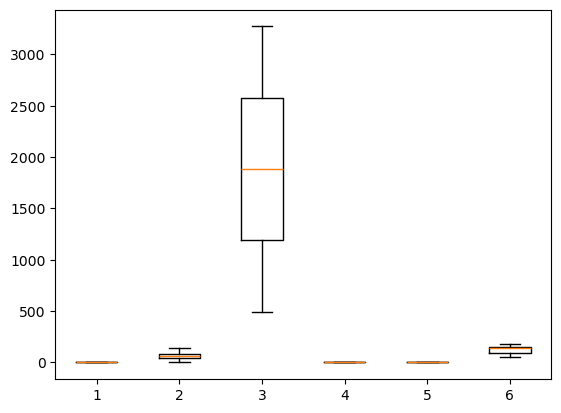

In [224]:
plt.boxplot(df)
plt.show()

In [226]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df[['RHOB','GR','DEPTH_MD','PEF','DTC']]= minmax_scaled.fit_transform(df[['RHOB','GR','DEPTH_MD','PEF','DTC']])
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.561250,0.000000,0.404547,1.0,0.876716
1,0.318528,0.554137,0.000055,0.404547,1.0,0.872327
2,0.322946,0.520460,0.000109,0.404547,1.0,0.868752
3,0.319919,0.505724,0.000164,0.404547,1.0,0.868550
4,0.312121,0.497005,0.000219,0.404547,1.0,0.868375


In [228]:
columns_to_scale = ['RHOB', 'GR', 'DEPTH_MD', 'PEF', 'DTC']
df[columns_to_scale] = minmax_scaled.fit_transform(df[columns_to_scale])

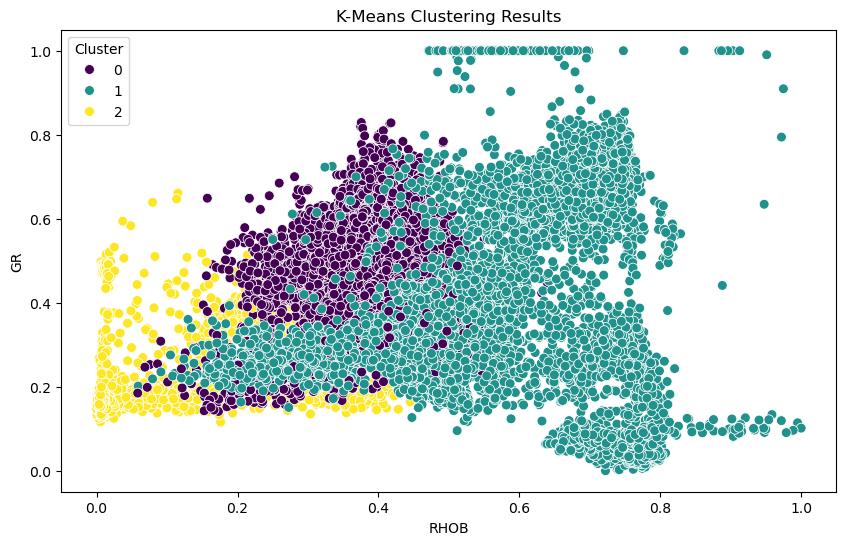

Cluster Centers:
       RHOB        GR  DEPTH_MD       PEF       DTC
0  0.393906  0.477518  0.323793  0.314574  0.756112
1  0.632744  0.427797  0.794343  0.613246  0.307868
2  0.112909  0.232924  0.168311  0.039547  0.790786


In [274]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[columns_to_scale])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RHOB', y='GR', hue='Cluster', data=df, palette='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.legend(title='Cluster')
plt.show()
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns_to_scale)
print("Cluster Centers:")
print(centers)


In [276]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [277]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

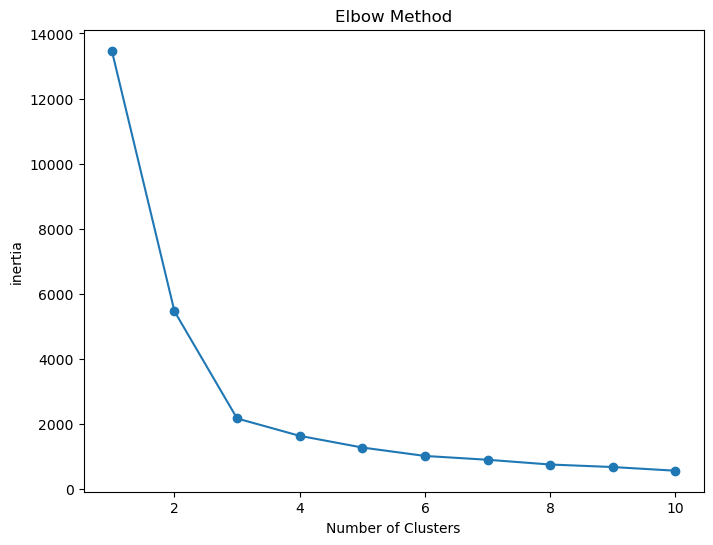

In [280]:
plt.figure(figsize = (8,6))
plt.plot(range(1,11), inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [266]:
y_kmeans = kmeans.fit_predict(X)
X = df[['RHOB','GR']]
X.head(3)

,RHOB,GR
0,0.314847,0.561250
1,0.318528,0.554137
2,0.322946,0.520460


In [268]:
def predict_cluster(RHOB, GR):
  new_data = [[RHOB,GR]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [270]:
new_data_RHOB = 290
new_data_GR = 24

predicted_cluster = predict_cluster(new_data_RHOB,new_data_GR)
print(f'The data belongs to cluster: {predicted_cluster}')

The data belongs to cluster: 2


C:\Users\S Muhammed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [272]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.452479538896131


In [284]:
for k in range(2, 5):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=minmax_scaled[:, 0], y=minmax_scaled[:, 1],
        hue=data[f'Cluster_k{k}'], palette='viridis', s=100
    )
    plt.title(f"K-Means Clustering Results for k={k}")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.legend(title="Cluster")
    plt.show()

TypeError: 'MinMaxScaler' object is not subscriptable

<Figure size 800x600 with 0 Axes>